# Clustering de documents

## Imports

In [3]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [ ]:
import nltk

nltk.download('punkt')

In [5]:
data_path = "../data/txteconomique/"

## Choisir une décennie

In [6]:
DECADE = '1940' #dans notre cas concernent  les fichiers de la periode 1945-1949 

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [7]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [ ]:
# Exemple de fichiers
files[1]

In [9]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [ ]:
# Nombre de documents
nombre_documents = len(texts)

# Afficher le nombre de documents
print("Nombre de documents:", nombre_documents)



In [ ]:
# Exemple de textes
texts[0][:400]

## Vectoriser les documents à l'aide de TF-IDF

In [12]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [13]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True) 

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [ ]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [ ]:
# Détail de la matrice
tfidf_vectors

### Imprimer le vecteur tf-IDF du premier document

In [ ]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

## Comprendre les vecteurs et leurs "distances"

In [ ]:
cosine([1, 2, 3], [1, 2, 3])

In [ ]:
cosine([1, 2, 3], [1, 2, 2])

In [ ]:
cosine([1, 2, 3], [2, 2, 2])

### Tests sur nos documents

In [20]:
tfidf_array = tfidf_vectors.toarray()

In [ ]:
# Vecteur du document 0
tfidf_array[0]

In [ ]:
# Vecteur du document 85
tfidf_array[85]

In [23]:
cosine(tfidf_array[0], tfidf_array[85])

0.8870201661417624

### Définir un nombre de clusters

In [24]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [25]:
km_model = KMeans(n_clusters=N_CLUSTERS)


### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [ ]:
clusters = km_model.fit_predict(tfidf_vectors)

In [27]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [ ]:
pprint(dict(clustering))

## Visualiser les clusters

In [29]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [ ]:
reduced_vectors.shape

In [ ]:
# Obtenir les dimensions de reduced_vectors
nombre_documents, nombre_composantes = reduced_vectors.shape

print("Nombre de documents:", nombre_documents)
print("Nombre de composantes principales:", nombre_composantes)

In [ ]:
reduced_vectors[:1000]

### Générer le plot

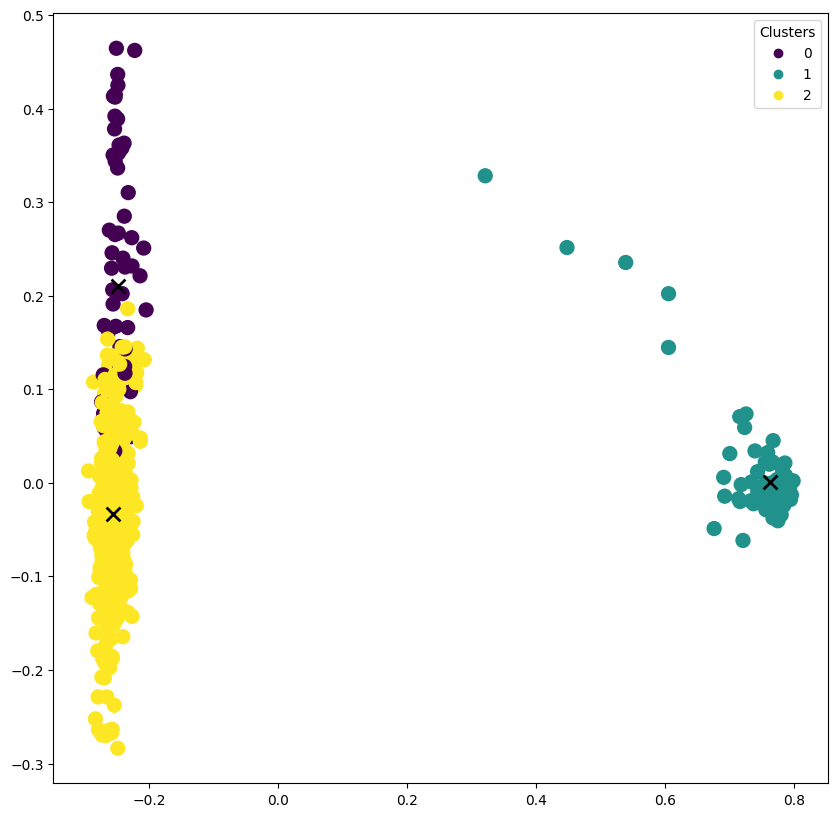

In [33]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]


plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

#ANALYSE avec Nuage de mots : nuage de mot pour chaque cluster

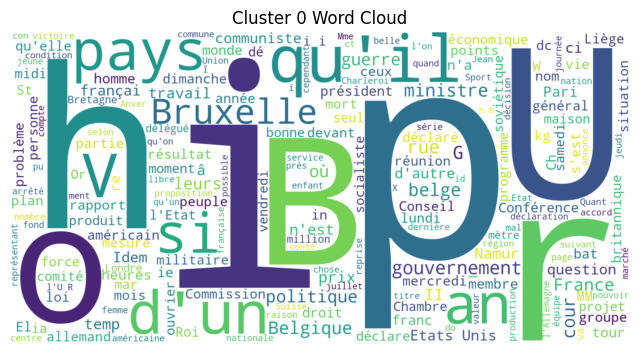

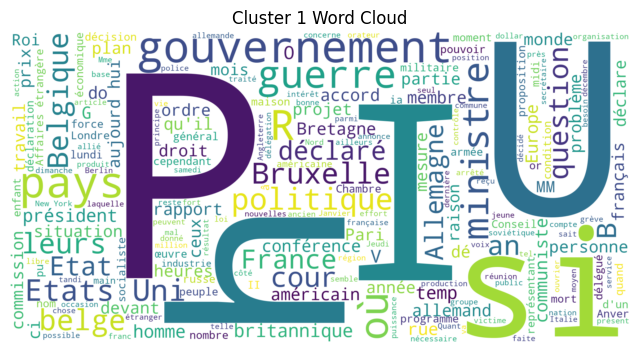

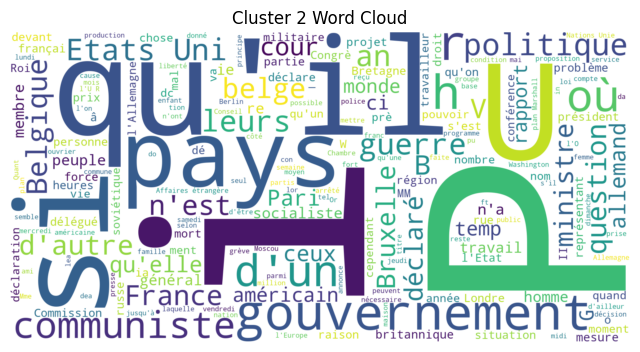

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


# Définir la liste de stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres","enfin","van","pr","A","F","MN","bon","d'une","k","plat","trè","voir",
       "ver","but","parti","car","rien","fin","fr","E","A","là", "fin","li", "lu", "ni", "c'est", "etc" ,"sc","déjà", "pt", "celui", "jour","vue",
       "pay","plusieurs","jeu", "part",  "ensuite", "place", "heure", "dernier", "premier", "nouveau", "grand", "petit", "certain",
    "propre", "quelque", "chaque", "tous", "autre", "même", "très", "plus",
    "moins", "assez", "bien", "peu", "trop", "aussi", "encore", "jamais",
    "toujours", "parfois", "souvent", "rarement", "quelquefois", "déjà",
    "encore", "presque", "simplement", "seulement", "peut-être", "probablement",
    "vraiment", "peut-être", "également", "ainsi", "alors", "avant", "après",
    "ici", "là", "maintenant", "hier", "aujourd'hui", "demain", "sous", "entre",
    "sans", "contre", "vers" ,  "aussi", "bien", "tout", "toute", "autre", "encore", "peut-être", "seulement",
    "sans", "sous", "après", "avant", "dernier", "nouveau", "premier", "grand",
    "petit", "même", "quelque", "chaque", "tous", "plusieurs", "certain", "divers",
    "nombreux", "propre", "quelques", "différent", "toutefois", "ainsi", "alors",
    "avant", "très", "plus", "moins", "assez", "beaucoup", "peu", "trop", "très",
    "comme", "dont", "pendant", "vers", "contre", "entre", "sans", "chez" , "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "ils", "bien", "sans", "peut", "tous", "après", "ainsi",
        "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir",
          "doit", "contre", "depuis", "autres", "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "etc", "mod", "bel", "ruo", "adr", "ecr", "aveo", 
          "app", "gar", "bx", "dos", "wai", "pet", "dés", "fer", "sal", "com", "quelques", "rien", "dès", "première", "puis", "chef", "cas", "car", "cinq", 
          "sujet", "pris", "hier", "fin", "elles", "effet", "declare", "ici", "voici", "celui", "trop", "doivent", "suite", "matin", "soir", "hier", "tres",
            "fin", "chez", "bon", "fois", "lieu", "quatre", "jours", "demande", "beaucoup", "dejà", "bureau", "paix", "tant", "maintenat", "aucune", "grands", 
            "avant", "point", "grandes", "parce", "prendre", "alors", "heure", "vient", "dejà", "afin", "vers", "mis", "mardi", "pourrait", "services", "hui"
              "souvent" ,"peut-être","vraiment","peu","bien","très","beaucoup","tout","toute","toutes","tous","plusieurs","certains","certaine","certaines",
                "divers","diverse","plus","moins","assez","tellement","hier","aujourd'hui","demain","jamais","souvent","parfois","rarement","quelquefois",
                "actuellement","déjà","encore","enfin","ainsi","alors","avant","après","ensuite","envers","contre", "nouveau", "nouvelle", "premier", 
                "première", "grand", "grande", "plusieurs", "certains", "certaines", "beaucoup", "tout", "toute", "toutes", "tous",
    "autre", "autres", "même", "peu", "très", "moins", "assez", "tellement", "plus", "moins", "ainsi", "alors", "encore", "jamais", "toujours", "souvent",
      "parfois", "rarement", "quelquefois", "peut-être", "peut", "bien", "aussi", "déjà", "encore", "seulement", "simplement", "probablement", 
      "actuellement","particulièrement", "notamment", "surtout"]
sw = set(sw)


# Vous pourriez ensuite filtrer ces mots de votre analyse textuelle.

# Créer un dictionnaire pour stocker les textes dans chaque cluster
cluster_texts = {cluster: [] for cluster in range(N_CLUSTERS)}

# Ajouter les textes dans chaque cluster
for idx, label in enumerate(clusters):
    cluster_texts[label].append(texts[idx])

# Créer et afficher le nuage de mots pour chaque cluster
for cluster_label, cluster_text in cluster_texts.items():
    # Concaténer les textes dans le cluster en une seule chaîne
    cluster_text_combined = " ".join(cluster_text)

    # Éliminer les stopwords de la chaîne de texte
    cluster_text_combined = ' '.join([word for word in cluster_text_combined.split() if word.lower() not in sw])
   
    # Créer le nuage de mots avec les stopwords filtrés
    wordcloud = WordCloud(width=2000, height=1000, background_color="white", stopwords=sw).generate(cluster_text_combined)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Cluster {cluster_label} Word Cloud")
    plt.axis("off")
    plt.savefig(f'wordcloudcluster{cluster_label}.png')
    plt.show()
